# packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

tf.compat.v1.reset_default_graph()


/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sba/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

# functions

In [17]:
def format_data(prices, win_size, offset):

    nb_samples = len(prices)
    samples = []
    targets = []
    for n in range(nb_samples-win_size-offset):
        samples.append(prices[n:n+win_size])
        targets.append(prices[n+win_size+offset])
        
    samples = np.array(samples)
    samples = np.reshape(samples, (samples.shape[0], 1, samples.shape[1]))
    
    targets = np.array(targets)
        
    return samples, targets


def create_mlp_model(hidden_size, win_size):
    
    model = Sequential()
    model.add(Dense(hidden_size, input_shape=(1,win_size), activation='relu'))
    model.add(Dense(1))
    model.summary()
    
    return model

In [18]:
xls_file = "Crude Oil Prices Daily.xlsx"
df = pd.read_excel(xls_file)
df.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [19]:
nb_rows = df.shape[0]
timestamps = []
closing_prices = []
counter=0

for n in range(nb_rows):
    value = df["Closing Value"][n]
    if not np.isnan(value):
        closing_prices.append(value)
        timestamps.append(df["Date"][n].timestamp())
        if counter==0:
            starting_timestamp=timestamps[0]
        timestamps[counter]-=starting_timestamp
        timestamps[counter]/=86400
        counter+=1

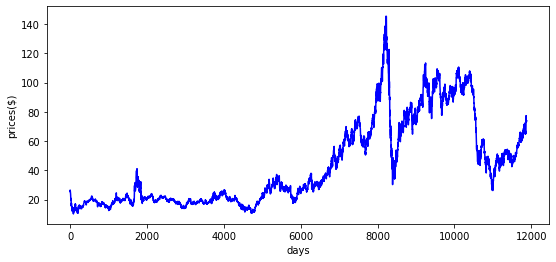

In [20]:
plt.figure(figsize=(9, 4))
plt.plot(timestamps, closing_prices,color='b')
plt.xlabel("days")
plt.ylabel("prices($)")
plt.show()

In [21]:
win_size = 10
offset = 5

samples, targets = format_data(closing_prices, win_size, offset)

nb_samples=np.shape(samples)[0]
nb_train = int(0.80*nb_samples)

samples_train = samples[0:nb_train,:]
targets_train = targets[0:nb_train]

samples_test = samples[nb_train:nb_samples,:]
targets_test = targets[nb_train:nb_samples]

In [22]:
hidden_size=128
model= create_mlp_model(hidden_size, win_size)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
history=model.fit(samples_train, targets_train, epochs=100, batch_size=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1, 128)            1408      
_________________________________________________________________
dense_9 (Dense)              (None, 1, 1)              129       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6560/6560 [==============================] - 19s 3ms/sample - loss: 16.5507
Epoch 2/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 11.3683
Epoch 3/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 10.4457
Epoch 4/100
6560/6560 [==============================] - 19s 3ms/sample - loss: 9.9549
Epoch 5/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 9.5103
Epoch 6/100
6560/6560 [==============================] - 18s 3ms/sample - lo

6560/6560 [==============================] - 17s 3ms/sample - loss: 7.5892
Epoch 88/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.7198
Epoch 89/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.6344
Epoch 90/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.5740
Epoch 91/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.7052
Epoch 92/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.6277
Epoch 93/100
6560/6560 [==============================] - 17s 3ms/sample - loss: 7.5843
Epoch 94/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 7.5309
Epoch 95/100
6560/6560 [==============================] - 19s 3ms/sample - loss: 7.6098
Epoch 96/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 7.5138
Epoch 97/100
6560/6560 [==============================] - 18s 3ms/sample - loss: 7.3541
Epoch 98/100
6560/6560 [=====================

In [23]:
train_pred = model.predict(samples_train)
test_pred = model.predict(samples_test)

train_score = np.sqrt(mean_squared_error(np.squeeze(targets_train), np.squeeze(train_pred)))
print('train score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(np.squeeze(targets_test), np.squeeze(test_pred)))
print('test score: %.2f RMSE' % (test_score))

train score: 2.73 RMSE
test score: 3.27 RMSE


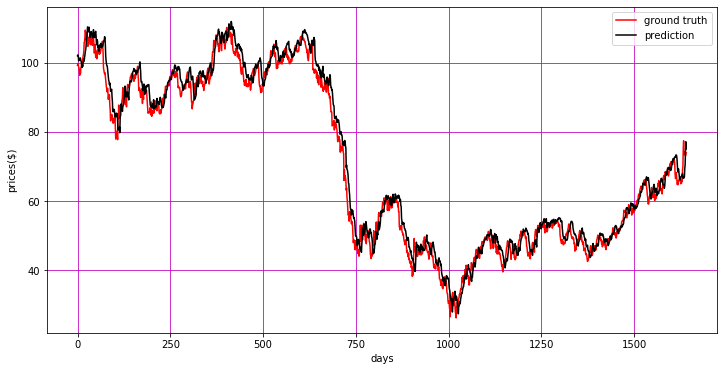

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(np.squeeze(targets_test),color='r',label="ground truth")
plt.plot( np.squeeze(test_pred),color='k',label="prediction")
plt.xlabel("days")
plt.ylabel("prices($)")
plt.legend()
plt.grid(color="m")
plt.show()